In [1]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt

L = 5e-3
# nz = np.array([28,100,200,400,800])#400
nz = np.array([28,100,200,52,800])#400
a_x = np.linspace(0,L,nz[0])
bx = np.linspace(0,L,nz[1])
cx = np.linspace(0,L,nz[2])
dx = np.linspace(0,L,nz[3])
fx = np.linspace(0,L,nz[4])

ay = np.loadtxt("untitled.txt", dtype=float)
ay = ay.ravel()
by = np.loadtxt("untitled1.txt", dtype=float)
by = by.ravel()
cy = np.loadtxt("untitled2.txt", dtype=float)
cy = cy.ravel()
# dy = np.loadtxt("untitled3.txt", dtype=float) #400
dy = np.loadtxt("untitled3-Copy1.txt", dtype=float) #52
dy = dy.ravel()
fy = np.loadtxt("untitled4.txt", dtype=float)
fy = fy.ravel()

# print(ay,fy)

In [11]:
a_in_f = np.around(np.linspace(0,nz[4]-1,nz[0]))
f_ay = []
q=0
for q in range(len(a_in_f)):
    f_ay = np.append(f_ay, fy[round(a_in_f[q])])
    q+=1
print(len(fy))
print(len(f_ay))

800
28


In [3]:
b_in_f = np.around(np.linspace(0,nz[4]-1,nz[1]))
f_by = []
q=0
for q in range(len(b_in_f)):
    f_by = np.append(f_by, fy[round(b_in_f[q])])
    q+=1

In [4]:
c_in_f = np.around(np.linspace(0,nz[4]-1,nz[2]))
f_cy = []
q=0
for q in range(len(c_in_f)):
    f_cy = np.append(f_cy, fy[round(c_in_f[q])])
    q+=1

In [5]:
d_in_f = np.around(np.linspace(0,nz[4]-1,nz[3]))
f_dy = []
q=0
for q in range(len(d_in_f)):
    f_dy = np.append(f_dy, fy[round(d_in_f[q])])
    q+=1

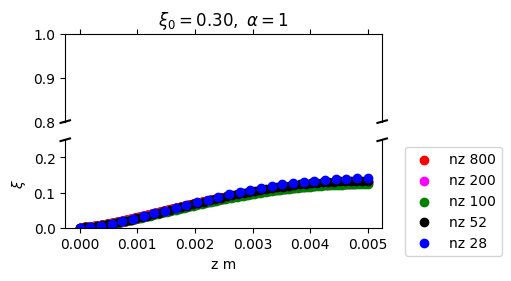

In [6]:
# fig, ax = plt.subplots(figsize = (5,2.7), layout='constrained')


# plt.scatter(fx,fy,color='red',label='nz 800')
# plt.scatter(dx,dy,color='black',label='nz 400')
# plt.scatter(cx,cy,color='magenta',label='nz 200')
# plt.scatter(bx,by,color='green',label='nz 100')
# plt.scatter(a_x,ay,color='blue',label='nz 28')
# plt.ylim([0,1])
# # plt.xticks(np.arange(0, 6, step=1))
# ax.set_xlabel('z m')
# ax.set_ylabel(r'$\xi$')
# ax.set_title(r'$\xi_0 = 0.30, \ \alpha=1$') 
# ax.grid(True)
# plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")



# plt.savefig('grid_spacing1.svg', dpi=220,bbox_inches='tight')

fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize = (5,2.7), layout='constrained')


plt.scatter(fx,fy,color='red',label='nz 800')
plt.scatter(cx,cy,color='magenta',label='nz 200')
plt.scatter(bx,by,color='green',label='nz 100')
plt.scatter(dx,dy,color='black',label='nz 52')
plt.scatter(a_x,ay,color='blue',label='nz 28')


ax.set_ylim(.80, 1.)  # outliers only
ax2.set_ylim(0, .25)
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
plt.xlabel('z m')
plt.ylabel(r'$\xi$')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
ax.set_title(r'$\xi_0 = 0.30, \ \alpha=1$') 
# ax.grid(True)
# ax2.grid(True)
# plt.savefig('nzall.svg', dpi=220,bbox_inches='tight')
# plt.savefig('nzall.pdf', dpi=220,bbox_inches='tight')
plt.show()

([<matplotlib.axis.XTick at 0x1268c4e50>,
 [Text(0.03571428571428571, 0, '1/28'),
  Text(0.019230769230769232, 0, '1/52'),
  Text(0.01, 0, '1/100'),
  Text(0.005, 0, '1/200')])

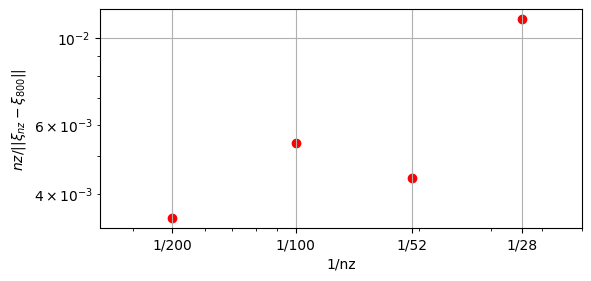

In [8]:
norm_f_a = np.linalg.norm(f_ay-ay, np.inf)
norm_f_b = np.linalg.norm(f_by-by, np.inf)
norm_f_c = np.linalg.norm(f_cy-cy, np.inf)
norm_f_d = np.linalg.norm(f_dy-dy, np.inf)

norms = np.array([norm_f_a, norm_f_b, norm_f_c, norm_f_d])
# norms = np.array([norm_f_a, norm_f_b, norm_f_c])


fig, ax = plt.subplots(figsize = (5.8,2.7), layout='constrained')
# fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize = (5,2.7), layout='constrained')
bestfit = np.polyfit(1/(nz[0:4]), norms, 1)

bestfitx = np.linspace(1/200, 1/28, 100)
ax.scatter(1/(nz[0:4]), norms,color='red')
# ax.scatter(bestfitx, bestfit[0]*bestfitx + bestfit[1])

# ax2.scatter(nz[0:4], norms,color='red')
# ax.set_ylim(.80, 1.)  # outliers only
# ax2.set_ylim(0, .20)
# ax.spines['bottom'].set_visible(False)
# ax2.spines['top'].set_visible(False)
# ax.xaxis.tick_top()
# ax.tick_params(labeltop=False)  # don't put tick labels at the top
# ax2.xaxis.tick_bottom()
# d = .015
# kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
# ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
# kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
plt.xlabel('1/nz')
plt.ylabel(r'$nz/||\xi_{nz} - \xi_{800}||$')

ax.set_xscale("log")
# ax2.set_xscale("log")
ax.set_yscale("log")
# plt.ylim(1e-5,1e-3)
plt.xlim(1/300,1/20)
# ax2.set_yscale("log")
ax.grid(True)
plt.xticks([1/28, 1/52, 1/100, 1/200],['1/28','1/52','1/100','1/200'])
# plt.savefig('nzloglog.pdf', dpi=220,bbox_inches='tight')
# plt.savefig('nzloglog.svg', dpi=220,bbox_inches='tight')
# plt.show()

# plt.scatter(nz[0:4], norms)


